Python implementation of a RBF Network

In [2]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt

In [6]:
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        print( "center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y

center [array([ 0.91919192]), array([-0.29292929]), array([ 0.6969697]), array([-0.45454545]), array([-0.47474747]), array([-0.77777778]), array([ 0.37373737]), array([ 0.39393939]), array([-0.65656566]), array([-1.])]
[[  1.59556073e-13   1.83231154e-02   9.88271037e-11   9.25352812e-02
    1.10016852e-01   6.73638455e-01   2.77558261e-07   1.77457220e-07
    3.89232983e-01   1.00000000e+00]
 [  2.95738407e-13   2.29529515e-02   1.70480749e-10   1.10016852e-01
    1.29949664e-01   7.21446326e-01   4.31299270e-07   2.77558261e-07
    4.33513181e-01   9.96740351e-01]
 [  5.44585659e-13   2.85655008e-02   2.92172073e-10   1.29949664e-01
    1.52494854e-01   7.67618196e-01   6.65836147e-07   4.31299270e-07
    4.79688225e-01   9.87025018e-01]
 [  9.96296840e-13   3.53190672e-02   4.97469134e-10   1.52494854e-01
    1.77786712e-01   8.11429096e-01   1.02122184e-06   6.65836147e-07
    5.27326857e-01   9.71042777e-01]
 [  1.81082043e-12   4.33851086e-02   8.41506855e-10   1.77786712e-01
   

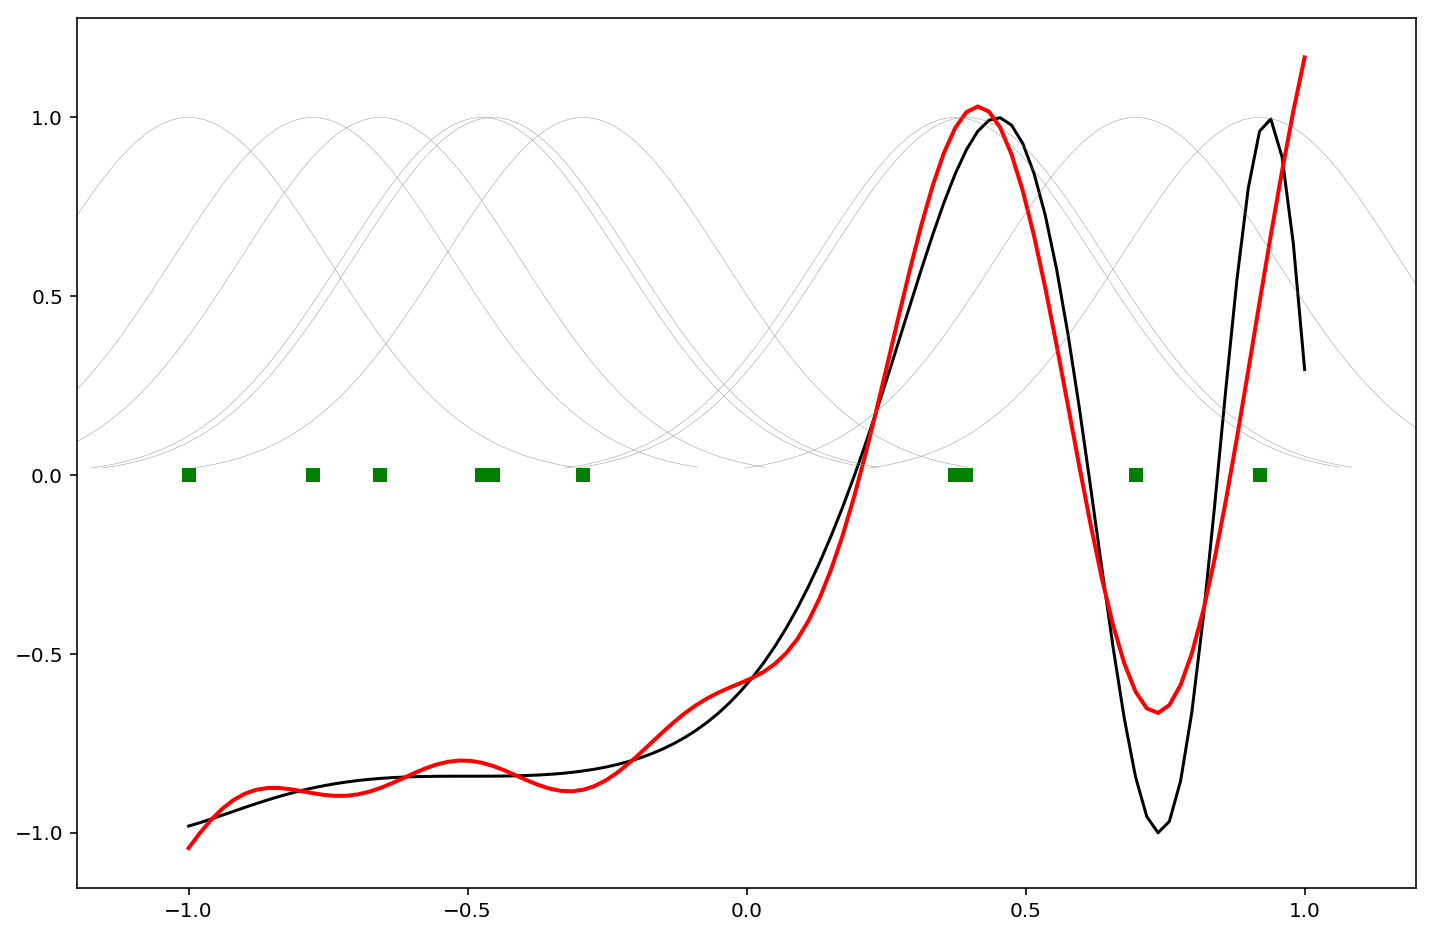

In [8]:
if __name__ == '__main__':
    n = 100
     
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    # set y and add random noise
    y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
    rbf = RBF(1, 10, 1)
    rbf.train(x, y)
    z = rbf.test(x)
       
    # plot original data
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
     
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)
     
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()